In [3]:
%load_ext autoreload
%autoreload 2

%config IPCompleter.greedy=True

In [35]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

import snapshot_obj
import dataset_compute

import importlib

In [36]:
importlib.reload(snapshot_obj)
importlib.reload(dataset_compute)

<module 'dataset_compute' from '/home/kasper/Curvaton_Simulations/APOSTLE_analysis/dataset_compute.py'>

In [39]:
# Get LCDM data:
sim_id = "CDM_V1_LR"
snap_id = 127
LCDM = snapshot_obj.Snapshot(sim_id, snap_id)

# central:
gn = 1

In [40]:
gns = LCDM.get_subhalos("GroupNumber")
sgns = LCDM.get_subhalos("SubGroupNumber")
sm = LCDM.get_subhalos("Stars/Mass") * u.g.to(u.Msun)
cops = LCDM.get_subhalos("CentreOfPotential") * u.cm.to(u.kpc)
mass = LCDM.get_subhalos('Mass') * u.g.to(u.Msun)

gal_centre = cops[np.logical_and(gns == gn, sgns == 0)]

# Choose galaxy satellites and with total mass sufficient for galaxy formation:
mask = np.logical_and.reduce((gns == gn, sgns != 0, mass > 10**8))
cops = cops[mask]
sm = sm[mask]

# Calculate distances to centre:
r = dataset_compute.periodic_wrap(LCDM, gal_centre, cops)
r = np.linalg.norm(cops - gal_centre, axis=1)
r_lum = r[sm > 0]
r_dark = r[sm == 0]

r_lum.sort()
r_dark.sort()

Text(0.5, 1.0, 'Satellites of halo gn=1 by distance')

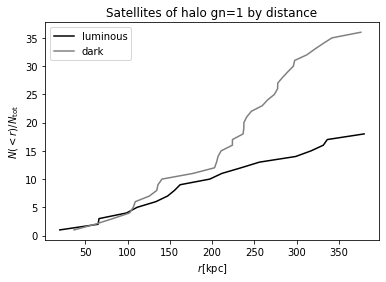

In [41]:
fig, axes = plt.subplots()

axes.plot(r_lum, np.arange(1,r_lum.size+1), c="black", label='luminous')
axes.plot(r_dark, np.arange(1,r_dark.size+1), c="grey", label='dark')

axes.legend(loc=0)
axes.set_xlabel('$r[\mathrm{kpc}]$')
axes.set_ylabel('$N(<r)/N_\mathrm{tot}$')
axes.set_title('Satellites of halo gn={} by distance'.format(gn))
